## -----------Start M2-Week 12 Assignment/21th Nov 2016------------------------------
<li><strong>Title:</strong> Module 2 / Week 12: Recommenders  
<li><strong>Purpose:</strong>Recommenders with Movie review Dataset
<li><strong>Name:</strong>RAJESH ASHOK JAISWAL UIN:669012329
<li><strong>DATED:</strong>11/21/2016

#### Here I am going to import all required parameters and classifier

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

### -------------------------------------What is Recommender System--------------------------------
Recommender systems or recommendation systems (sometimes replacing "system" with a synonym such as platform or engine) are a subclass of information filtering system that seek to predict the "rating" or "preference" that a user would give to an item.

Recommender systems have become extremely common in recent years, and are utilized in a variety of areas: some popular applications include movies, music, news, books, research articles, search queries, social tags, and products in general. There are also recommender systems for experts,collaborators, jokes, restaurants, garments, financial services life insurance, romantic partners (online dating), and Twitter pages.

### -------------------------------How we are working---------------------------------------------
<li> Will download data from moview rating google document and load it into local dataframe 'MData'

In [2]:
# Here I am going to fetch our class student rating into dataframe "MData'
MData = pd.read_csv('MovieReviews.csv',index_col=0)

In [3]:
#Display data 
MData.head(10)

,American Sniper,The Hunger Games: Mockingjay - Part 1,Guardians of the Galaxy,The Lego Movie,The Hobbit,Transformers,Malificent,Big Hero 6,Godzilla,Interstellar,How to Train your Dragon 2,Gone Girl,Divergent,The Fault in Our Stars,Unbroken,300: Rise of an Empire
Aarti Jaiswal,4.0,NaN,NaN,NaN,4.0,3.0,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
Aditya Dharmasagar,5.0,NaN,NaN,4.0,5.0,4.0,4.0,NaN,4.0,5.0,5.0,5.0,4.0,4.0,NaN,5.0
Adrian Cavallaris,NaN,4.0,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Ahmed Muheebuddin,5.0,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aishwarya reddy,NaN,3.0,4.0,3.0,4.0,4.0,3.0,NaN,4.0,4.0,3.0,5.0,NaN,4.0,NaN,3.0
Akhilesh,NaN,NaN,4.0,3.0,5.0,4.0,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,5.0
Andrew Webb,4.0,3.0,4.0,3.0,3.0,2.0,NaN,4.0,3.0,4.0,3.0,4.0,2.0,3.0,NaN,3.0
Anirudh,3.0,4.0,5.0,3.0,5.0,3.0,5.0,NaN,4.0,NaN,NaN,2.0,3.0,4.0,NaN,2.0
Anirudh Thota,NaN,3.0,4.0,3.0,3.0,4.0,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,4.0
anurag,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,3.0,NaN,3.0,NaN,NaN,5.0


### -------------------will handle missing data of continous columns ---------------------------
<li>Here I am going to replace each missing value of each column by its mean value

In [4]:
#here i going to check is there any continous column present in Tdata dataframe with missing values.
#will check is there any missing values
[col for col in MData.columns 
     if MData[col].isnull().any()]

['American Sniper',
 'The Hunger Games: Mockingjay - Part 1',
 'Guardians of the Galaxy',
 'The Lego Movie',
 'The Hobbit',
 'Transformers',
 'Malificent',
 'Big Hero 6',
 'Godzilla',
 'Interstellar',
 'How to Train your Dragon 2',
 'Gone Girl',
 'Divergent',
 'The Fault in Our Stars',
 'Unbroken',
 '300: Rise of an Empire']

In [5]:
#will use for loop to fill missing value with its mean value for each column
for col in MData.columns: 
     if MData[col].isnull().any():
            MData[col].fillna(MData[col].mean(), inplace=True)

In [6]:
#will check is there any missing values after handling
[col for col in MData.columns 
     if MData[col].isnull().any()]

[]

##          --------------------------Pearson Value Calculation-----------------------------
$$r =  \frac{\sum {(x-\overline{x})(y-\overline{y})}}{\sigma_x \sigma_y}$$

and returns a value of 1 for strongly corellated data, -1 for strongly negatively correlated, and 0 for no correlation

In [8]:
#Here we will Define one function to calculate person value to check comparision
def pearson(s1, s2):
    """Take two pd.Series objects and return a pearson correlation."""
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

#### Here we are going to apply recommender method

In [9]:
def get_recs(movie_name, MData, num):

    import numpy as np
    reviews = []
    for title in MData.columns:
        if title == movie_name:
            continue
        cor = pearson(MData[movie_name], MData[title])
        if np.isnan(cor):
            continue
        else:
            reviews.append((title, cor))
    
    reviews.sort(key=lambda tup: tup[1], reverse=True)
    return reviews[:num]

## ----------------------------------Evaluation of Questions-----------------------------------

### Question 1:  What movie is most Similar to 'The fault in our stars' (60 pts)

I am going to follow below mentioned steps
<li> Using get_recs function defined above will calculate 10 moviee which are more similar to 'The Fault in Our Stars' Movie

In [10]:
MostSimilarMovie = get_recs('The Fault in Our Stars', MData, 10)

In [11]:
MostSimilarMovie[:10]

[('Malificent', 0.98990351718511904),
 ('How to Train your Dragon 2', 0.98751790476733559),
 ('Divergent', 0.98732713190836674),
 ('Guardians of the Galaxy', 0.98703006291143658),
 ('Interstellar', 0.98680894154585141),
 ('Gone Girl', 0.98676951446375116),
 ('300: Rise of an Empire', 0.98589462187265253),
 ('The Hobbit', 0.98573338062470472),
 ('Godzilla', 0.98539085689089734),
 ('The Lego Movie', 0.9851910606274612)]

### Conclusion for Question 1:
<li> Movie <strong>'Malificent'</strong>is most similar movie like 'The Fault in Our Stars'
<li> Movies like 'How to Train your Dragon 2','Divergent','Guardians of the Galaxy' also similar to movie ''The Fault in Our Stars' as they are lagging behind by very less margin as per the ratings

### ---------------A movie,which is  dissimilar to 'The fault in our stars'----------------------------------------

In [12]:
DisSimilarMovie = get_recs('The Fault in Our Stars', MData, 16)

In [13]:
DisSimilarMovie[-10:]

[('Gone Girl', 0.98676951446375116),
 ('300: Rise of an Empire', 0.98589462187265253),
 ('The Hobbit', 0.98573338062470472),
 ('Godzilla', 0.98539085689089734),
 ('The Lego Movie', 0.9851910606274612),
 ('Big Hero 6', 0.98497553269169802),
 ('The Hunger Games: Mockingjay - Part 1', 0.98437494284422389),
 ('Transformers', 0.98433042850761121),
 ('American Sniper', 0.98397397967031597),
 ('Unbroken', 0.98040866079834033)]

### Movies Such as 'Gone Girl',300: Rise of an Empire' are most dissimilar to movie The Fault in Our Stars as per the rating results 

## -------------------------- Question 2:----------------------------------------------------------  
### Which movie(s) would you most like to see, based on your classmates experience? (40 pts)
To draw a result for this question i will follow below steps
<li> Fisrt will found my ratings and arrange them as per the rating given by me.
<li> Then will Calculate average rating of each movie and will arrange them descending order.
<li> Then those movies have most ratings I will like to see with my friends

### Will Calculate My rating and will order them as per my ratings

In [14]:
#My Ratings
My_ratings = MData.ix['Rajesh Jaiswal'].dropna()

In [15]:
My_ratings

American Sniper                          4.0
The Hunger Games: Mockingjay - Part 1    3.0
Guardians of the Galaxy                  3.0
The Lego Movie                           4.0
The Hobbit                               4.0
Transformers                             5.0
Malificent                               4.0
Big Hero 6                               5.0
Godzilla                                 4.0
Interstellar                             5.0
How to Train your Dragon 2               5.0
Gone Girl                                3.0
Divergent                                3.0
The Fault in Our Stars                   3.0
Unbroken                                 5.0
300: Rise of an Empire                   5.0
Name: Rajesh Jaiswal, dtype: float64

In [16]:
My_ratings.sort(ascending=False)

/Users/rajeshjaiswal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [17]:
My_Fav_Movie_Name = My_ratings

In [18]:
My_Fav_Movie_Name

300: Rise of an Empire                   5.0
Unbroken                                 5.0
How to Train your Dragon 2               5.0
Interstellar                             5.0
Big Hero 6                               5.0
Transformers                             5.0
Godzilla                                 4.0
Malificent                               4.0
The Hobbit                               4.0
The Lego Movie                           4.0
American Sniper                          4.0
The Fault in Our Stars                   3.0
Divergent                                3.0
Gone Girl                                3.0
Guardians of the Galaxy                  3.0
The Hunger Games: Mockingjay - Part 1    3.0
Name: Rajesh Jaiswal, dtype: float64

### ----------------- Will calculate average rating of each movie-------------------------------------

In [19]:
# Calculate average rating using mean function
MData.mean()

American Sniper                          7.787302
The Hunger Games: Mockingjay - Part 1    6.412676
Guardians of the Galaxy                  7.739241
The Lego Movie                           6.513559
The Hobbit                               7.865854
Transformers                             7.013095
Malificent                               6.354237
Big Hero 6                               7.197872
Godzilla                                 6.572603
Interstellar                             8.378571
How to Train your Dragon 2               6.994366
Gone Girl                                7.134483
Divergent                                6.036066
The Fault in Our Stars                   6.341463
Unbroken                                 5.800000
300: Rise of an Empire                   7.151351
dtype: float64

In [20]:
# Will order them ascending order
MData.mean().order()

/Users/rajeshjaiswal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Unbroken                                 5.800000
Divergent                                6.036066
The Fault in Our Stars                   6.341463
Malificent                               6.354237
The Hunger Games: Mockingjay - Part 1    6.412676
The Lego Movie                           6.513559
Godzilla                                 6.572603
How to Train your Dragon 2               6.994366
Transformers                             7.013095
Gone Girl                                7.134483
300: Rise of an Empire                   7.151351
Big Hero 6                               7.197872
Guardians of the Galaxy                  7.739241
American Sniper                          7.787302
The Hobbit                               7.865854
Interstellar                             8.378571
dtype: float64

/Users/rajeshjaiswal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


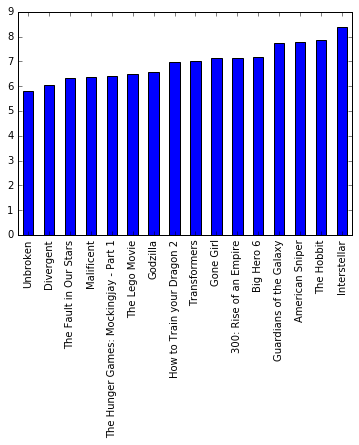

In [21]:
#Will plot average graph of mean values
%matplotlib inline
MData.mean().order().plot(kind='bar')

## Conclusion(Result ) of Question2:
<li> As per the result of output[18],I like below movies very much those having rating '5 out of 5'
<pre>
                <strong>300: Rise of an Empire                   5.0</strong>
                <strong>Unbroken                                 5.0</strong>
                <strong>How to Train your Dragon 2               5.0</strong>
                <strong>Interstellar                             5.0</strong>
                <strong>Big Hero 6                               5.0</strong>
                <strong>Transformers                             5.0</strong>
</pre>                
<li> And as per output of [20] the averager rating of movies of class below movies have highest ratings
<pre>
                <strong>Guardians of the Galaxy                  7.739241</strong>
                <strong>American Sniper                          7.787302</strong>
                <strong>The Hobbit                               7.865854</strong>
                <strong>Interstellar                             8.378571</strong>
</pre>                              
<li> <strong>My Conclusion<strong> I would like to see those movie which belongs to both categories mentioned above
movies such as:
<pre>
                    <strong>Interstellar</strong>
                    <strong>The Hobbit</strong>
</pre>                    

## Question 3:Bonus Question...  
### For all the movies you haven't seen, can you predict how you'd rate them using your
### the class reviews? (10 pts) :
To work on this problem i will follow below steps:
<li> Will consider average rating of each movie.
<li> Also consider the most similar movies those i liked.
<li> Will rate movies


In [22]:
#Display average ratings of each movie:
MData.mean().order()

/Users/rajeshjaiswal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Unbroken                                 5.800000
Divergent                                6.036066
The Fault in Our Stars                   6.341463
Malificent                               6.354237
The Hunger Games: Mockingjay - Part 1    6.412676
The Lego Movie                           6.513559
Godzilla                                 6.572603
How to Train your Dragon 2               6.994366
Transformers                             7.013095
Gone Girl                                7.134483
300: Rise of an Empire                   7.151351
Big Hero 6                               7.197872
Guardians of the Galaxy                  7.739241
American Sniper                          7.787302
The Hobbit                               7.865854
Interstellar                             8.378571
dtype: float64

In [23]:
#Similar to movies those i liked.
MostSimilarMovie = get_recs('300: Rise of an Empire', MData, 10)

In [24]:
MostSimilarMovie[:10]

[('Godzilla', 0.99474310999059301),
 ('How to Train your Dragon 2', 0.99353342418272128),
 ('Transformers', 0.99333405627962257),
 ('The Hobbit', 0.9930312632560172),
 ('Guardians of the Galaxy', 0.99272107142378396),
 ('Interstellar', 0.99249568285216316),
 ('The Hunger Games: Mockingjay - Part 1', 0.99211854358072726),
 ('American Sniper', 0.99181961419860631),
 ('Malificent', 0.99123514764264908),
 ('Divergent', 0.9907550621125395)]

## Conclusion(Result) Question 3:
<li> I will rate movies those I haven't seen using combination of average rating and similarity pattern with movie I have seen.
<li> Such as i will rate high ratings to below mentioned movies:
<pre>
   <strong>Guardians of the Galaxy</strong>
   <strong>American Sniper</strong>
</pre>   

## ------------------------------------End of Assignment--------------------------------------------